# 2019-nCov Analysis, Assessing the Surge Capacity
### Affan Shoukat

The script reads the output files from the general model defined in `ncov_gen_model.jl` and plots the results for the manuscript. 

In [1]:
# load packages
using Distributions, DataFrames, CSV, Query, VegaLite, LsqFit, Plots, PrettyTables, StatsPlots, Interpolations
using Base.Iterators, Random
pyplot()
#PyPlot.svg(true)
pwd()

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1273
┌ Info: Precompiling Query [1a8c2f83-1ff3-5112-b086-8aa67b057ba1]
└ @ Base loading.jl:1273
┌ Info: Precompiling VegaLite [112f6efa-9a02-5b7d-90c0-432ed331239a]
└ @ Base loading.jl:1273
┌ Info: Precompiling LsqFit [2fda8390-95c7-5789-9bda-21331edee243]
└ @ Base loading.jl:1273
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1273
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273


"/Users/abmlab/OneDrive/Documents/postdoc projects/2019-ncov/scripts"

In [201]:
dloc = "/Users/abmlab/Documents/data/outcome_based//b00304/v00"
s1 = "tau05_f005"
s2 = "tau10_f02"
global t = 1000
global nweek = Int(floor(t/7)) 

142

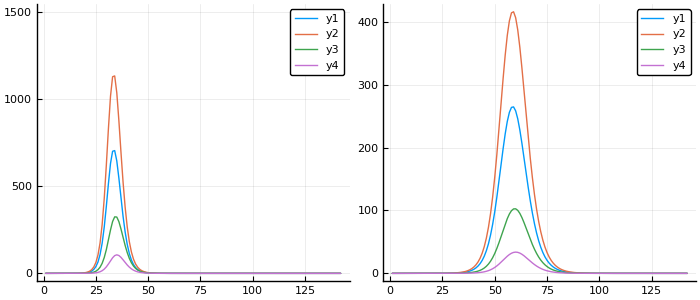

In [238]:
# do with s1 ie. 2 days, 5%

function getwinc(sstr) 
    ci = [CSV.read("$dloc/$sstr/ci$i.csv", header=["mc$i" for i = 1:100]) for i =1:4]
    cols = eachcol.(ci)
    minc = []
    for a in ci 
        getcols = collect(eachcol(a))    
        inc = circshift.(getcols, -1) .- getcols
        pop!.(inc)
        mn = mean.(eachrow(DataFrame(inc)))
        push!(minc, mn)
    end
    #plot(minc)
    #add up at weekly level
    winc = []
    for j = 1:4 
        push!(winc, [sum(minc[j][(7*i - 6):(7*i)]) for i = 1:nweek])
    end
    return minc, winc
end
s1winc = getwinc(s1)[2]
s2winc = getwinc(s2)[2]
l = @layout [a b;] 
p1 = plot(1:nweek, s1winc./10000, ylim=[0, 1500])
p2 = plot(1:nweek, s2winc./10000)
plot(p1, p2, layout=l, size=(700, 300))


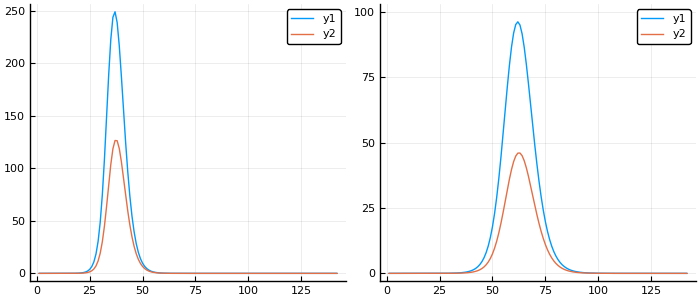

In [243]:
### icu bed occupancy
function icubedocc(str)
    ci = [CSV.read("$dloc/$str/icu$i.csv", header=["mc$i" for i = 1:100]) for i =1:4]
    minc = []
    for a in ci    
        mn = mean.(eachrow(a))
        push!(minc, mn)
    end
    winc = []
    for j = 1:4 
        push!(winc, [sum(minc[j][(7*i - 6):(7*i)]) for i = 1:nweek])
    end
    m = hcat(winc...)
    #msum = sum(m, dims=2)    
    return m
end
icu1m = icubedocc(s1)
icu1all = sum(icu1m, dims=2) ## all age groups added 
icu150 = sum(icu1m[:, 3:4], dims=2) ## only 50+ years of age


icu2m = icubedocc(s2)
icu2all = sum(icu2m, dims=2) ## all age groups added 
icu250 = sum(icu2m[:, 3:4], dims=2) ## only 50+ years of age

l = @layout [a b;] 
p1 = plot(1:nweek, [icu1all, icu150]./1000)
p2 = plot(1:nweek, [icu2all, icu250]./1000, ylim=[0, 100])
plot(p1, p2, layout=l, size=(700, 300))


In [265]:
ci = [CSV.read("$dloc/$s1/ch$i.csv", header=["mc$i" for i = 1:100]) for i =1:4]
minc = []
for a in ci    
        mn = mean.(eachrow(a))
        push!(minc, mn)
    end
lastval = [minc[i][end] for i = 1:4 ]
lastval ./ (81982665,129596376,63157200,52431193) 

4-element Array{Float64,1}:
 0.015868571169361904
 0.01583712563166976 
 0.010951126287208903
 0.006440325901222035

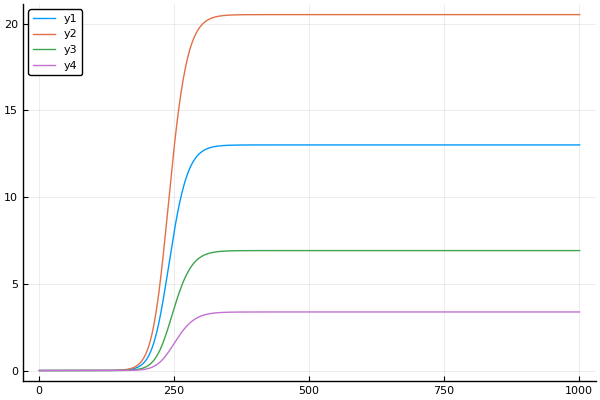